### Imagine a room full of 100 people with 100 dollars each. With every tick of the clock, every person with money gives a dollar to one randomly chosen other person. After some time progresses, how will the money be distributed?

Seen on [Decision Sience News](http://www.decisionsciencenews.com/2017/06/19/counterintuitive-problem-everyone-room-keeps-giving-dollars-random-others-youll-never-guess-happens-next/)

Here is a simple simulation written in Python

[Tim Finin](http://umbc.edu/~finin), finin@umbc.edu

In [9]:
from __future__ import division
import random
%matplotlib inline
import matplotlib.pyplot as plt

#### The simulation is orgaized as a series of eopchs (e.g, 1000), each with a number of clock ticks (e.g. 100).  Samples of data are collected for each epoch for the final graphs

In [10]:
# basic parameters
population_size = 100   # number of people
initial_wealth = 100    # initial money for each person
ticks = 100             # number of time ticks for each epoch
epochs = 1000           # number of epochs
samples = 3             # number of people to sample for plotting

In [11]:
#  helpful functions

def give(giver, new):
    """ person gives a dollar, if she has one, to a random other person.
        Current and new are wealth vectors"""
    # find someone to give it to other than i itself
    reciever = giver
    while (reciever == giver):
        reciever = random.randint(0, population_size - 1)
    # receiver gains a dollar, giver loses one
    new[reciever] += 1
    new[giver] -= 1

def gini(wealth):
    """ Returns population's Gini coefficient as a measure of inequality"""
    wealth = sorted(wealth)
    n = len(wealth)
    numer = 2 * sum((i+1) * wealth[i] for i in xrange(n))
    denom = n * sum(wealth)
    return (numer / denom) - (n + 1) / n


In [12]:
# initialize global vaiables

# list of integers identifying people
population = range(population_size)
# list of wealth of each person 
wealth = [initial_wealth] * population_size
# Keep track of the gini coef. after each epoch
gini_values = [gini(wealth)]
# sample the maxium wealth after each epoch
max_wealths = [100]
# saved samples of wealth after each epoch
wealth_samples = [wealth[:samples]]

#### This is the basic simulation loop

In [13]:
for _ in xrange(epochs):
    max_wealth = 0
    for _ in xrange(ticks):
        new = wealth[:]                # copy list
        for person in population:
            if wealth[person] > 0:
                give(person, new)      # ith person give a dollar to someone    
        wealth = new                   # update wealth vector
        max_wealth = max(max_wealth, max(wealth))
    max_wealths.append(max_wealth)
    gini_values.append(gini(wealth))
    wealth_samples.append(wealth[:samples])

#### Generate some final graphs to help understand the results

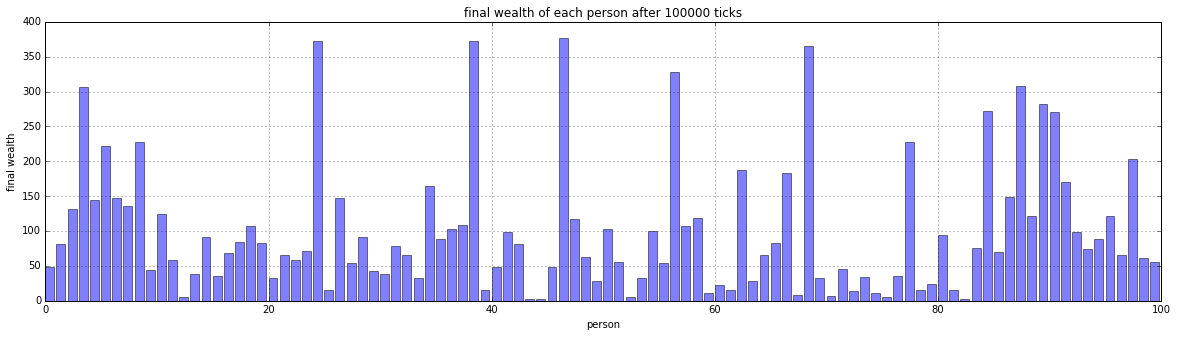

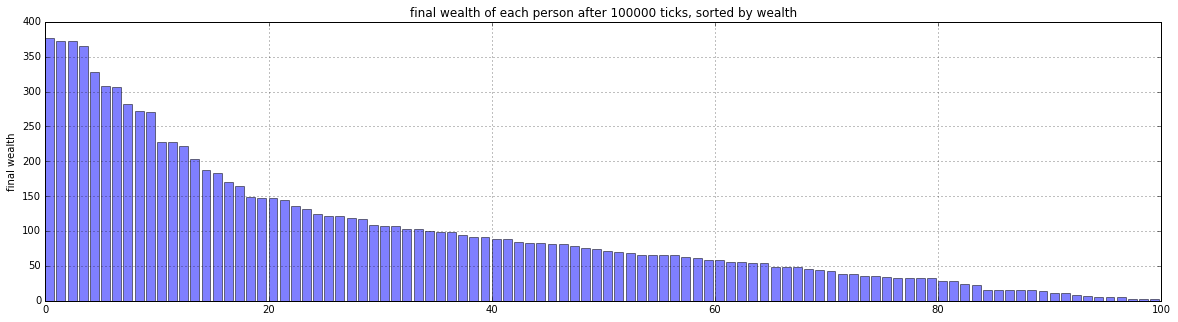

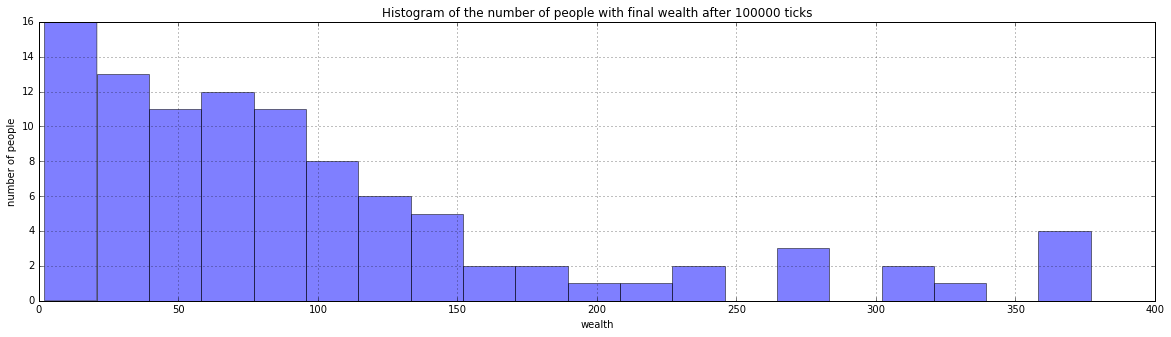

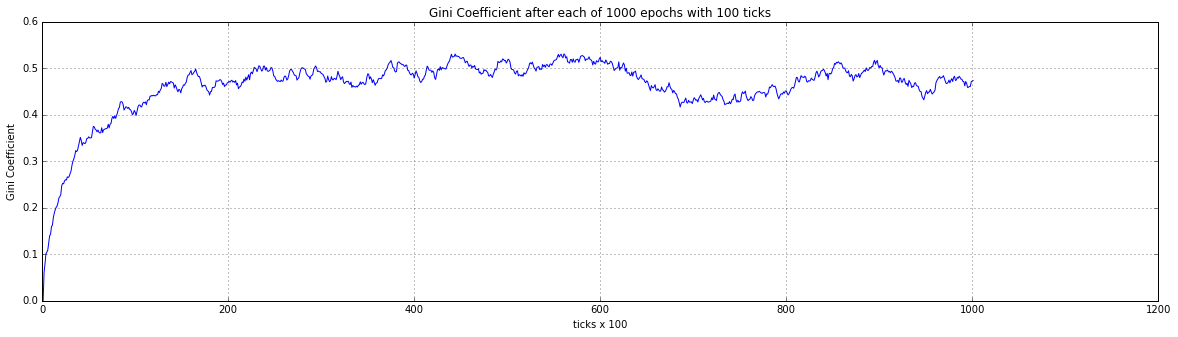

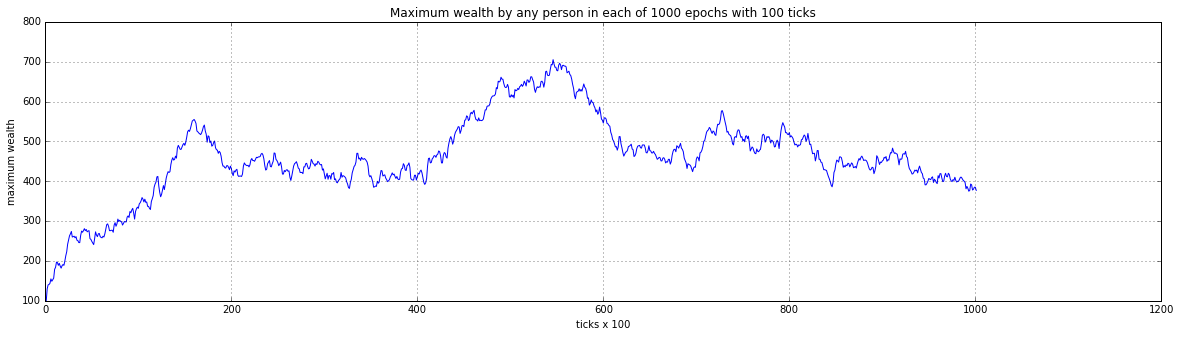

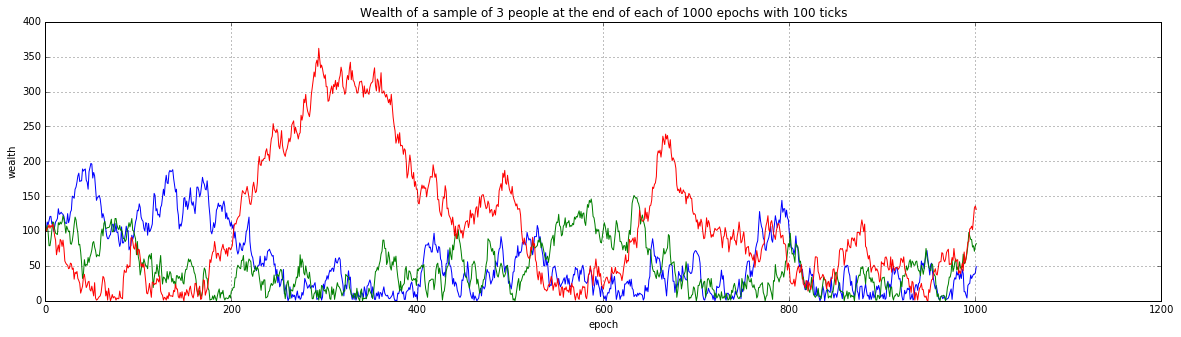

In [14]:
# bar plot of final wealth
plt.figure(figsize=(20,5))
plt.bar(population, wealth, 0.8, alpha=0.5)
plt.xlabel('person'); plt.ylabel('final wealth'); plt.grid(True)
plt.title('final wealth of each person after {} ticks'.format(epochs*ticks))
plt.show() 

# bar plot of final wealth, sorted by amount
plt.figure(figsize=(20,5))
plt.bar(population, sorted(wealth, reverse=True), 0.8, alpha=0.5)
plt.xlabel(''); plt.ylabel('final wealth'); plt.grid(True)
plt.title('final wealth of each person after {} ticks, sorted by wealth'.format(epochs*ticks))
plt.show() 

# histogram of number of people with final wealth
plt.figure(figsize=(20,5))
plt.hist(wealth, bins=20, alpha=0.5, label='histogram')
plt.xlabel('wealth'); plt.ylabel('number of people'); plt.grid(True)
plt.title('Histogram of the number of people with final wealth after {} ticks'.format(epochs*ticks))
plt.show()

# plot of gini coefficient after each epoch
plt.figure(figsize=(20,5))
plt.plot(range(1,epochs+2), gini_values)
plt.xlabel('ticks x 100'); plt.ylabel('Gini Coefficient'); plt.grid(True)
plt.title('Gini Coefficient after each of {} epochs with {} ticks'.format(epochs,ticks))
plt.show()

# plot of maxiumum wealth in each epoch
plt.figure(figsize=(20,5))
plt.plot(range(1,epochs+2), max_wealths)
plt.xlabel('ticks x 100'); plt.ylabel('maximum wealth'); plt.grid(True)
plt.title('Maximum wealth by any person in each of {} epochs with {} ticks'.format(epochs,ticks))
plt.show()


# plot of sample wealths aftr each epoch
plt.figure(figsize=(20,5))
for person in range(samples):
    plt.plot(range(1,epochs+2), [sample[person] for sample in wealth_samples])
plt.xlabel('epoch'); plt.ylabel('wealth'); plt.grid(True)
plt.title('Wealth of a sample of {} people at the end of each of {} epochs with {} ticks'.format(samples, epochs, ticks))
plt.show()